<a href="https://colab.research.google.com/github/abhi-11nav/image_classification/blob/main/imageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import tensorflow as tf
from tensorflow import keras 

In [3]:
!nvidia-smi

Sun Jun 19 14:08:16 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [21]:
tf.__version__

'2.8.2'

In [28]:
from tensorflow.keras.layers import Dense, Flatten, Input, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential   
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img 
from keras.applications.vgg19 import VGG19
from glob import glob

In [29]:
# Standard image_size 

image_size = [255,255]

train_path = "/content/drive/MyDrive/dataset/training_set/"
test_path = "/content/drive/MyDrive/dataset/test_set/"

In [30]:
# Data Augmentation

train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range = 0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [31]:
training_data = train_datagen.flow_from_directory(train_path,target_size=(224,224),batch_size=16,class_mode="categorical")

Found 8010 images belonging to 2 classes.


In [32]:
test_data = test_datagen.flow_from_directory(test_path,target_size=(224,224),batch_size=16,class_mode="categorical")

Found 1208 images belonging to 2 classes.


In [33]:
# Importing VGG19

vgg19 = VGG19(input_shape= image_size+[3], weights="imagenet", include_top=False)

80150528/80134624 [==============================] - 0s 0us/step


In [36]:
# Restricting the model to not update weights in existing layers

for layers in vgg19.layers:
  layers.trainiable= False

In [37]:
# Flattening the output layer 

x = Flatten()(vgg19.output)

In [43]:
categories = glob("/content/drive/MyDrive/dataset/training_set/*")

In [45]:
len(categories)

2

In [48]:
prediction = Dense(len(categories),activation="sigmoid")(x)

In [49]:
model = Model(inputs=vgg19.input,outputs=prediction)

In [50]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 255, 255, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 255, 255, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 255, 255, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 127, 127, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 127, 127, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 127, 127, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 63, 63, 128)       0     

In [55]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [56]:
run = model.fit_generator(training_data,validation_data = test_data, epochs=10, steps_per_epoch= len(training_data),validation_steps= len(test_data))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
501/501 [==============================] - 1914s 4s/step - loss: 0.7762 - accuracy: 0.5034 - val_loss: 0.6945 - val_accuracy: 0.1722
Epoch 2/10
501/501 [==============================] - 157s 314ms/step - loss: 0.6932 - accuracy: 0.4966 - val_loss: 0.6935 - val_accuracy: 0.1722
Epoch 3/10
501/501 [==============================] - 156s 312ms/step - loss: 0.6932 - accuracy: 0.4891 - val_loss: 0.6940 - val_accuracy: 0.1722
Epoch 4/10
501/501 [==============================] - 158s 315ms/step - loss: 0.6932 - accuracy: 0.4986 - val_loss: 0.6951 - val_accuracy: 0.1722
Epoch 5/10
501/501 [==============================] - 157s 313ms/step - loss: 0.6932 - accuracy: 0.4941 - val_loss: 0.6943 - val_accuracy: 0.1722
Epoch 6/10
501/501 [==============================] - 156s 311ms/step - loss: 0.6932 - accuracy: 0.4981 - val_loss: 0.6955 - val_accuracy: 0.1722
Epoch 7/10
501/501 [==============================] - 157s 313ms/step - loss: 0.6932 - accuracy: 0.4951 - val_loss: 0.6946 - v

In [60]:
import matplotlib.pyplot as plt 

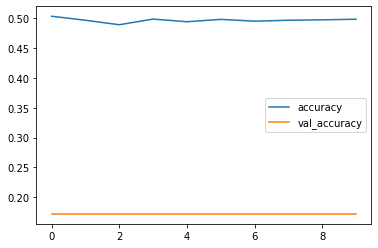

In [61]:
plt.plot(run.history['accuracy'],label="accuracy")
plt.plot(run.history['val_accuracy'], label="val_accuracy")
plt.legend()

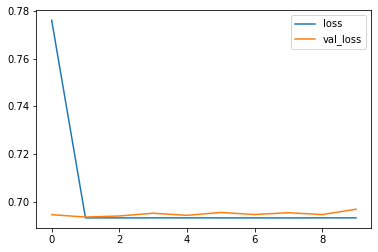

In [62]:
plt.plot(run.history['loss'],label="loss")
plt.plot(run.history['val_loss'], label="val_loss")
plt.legend()

In [65]:
from tensorflow.keras.models import load_model

model.save("model_vgg19.h5")